In [63]:
import pandas as pd
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
my_example_nc_file = 'EUREC4A_HALO_BAHAMAS-Radiometer_20200131a.nc'
fh = Dataset(my_example_nc_file, mode='r')
Short_down = fh.variables['FDSC'][:]
Short_Down = pd.DataFrame(Short_down.T)
Short_up = fh.variables['FUS'][:]
Short_Up = pd.DataFrame(Short_up.T)
Long_down = fh.variables['FDL'][:]
Long_Down = pd.DataFrame(Long_down.T)
Long_up = fh.variables['FUL'][:]
Long_Up = pd.DataFrame(Long_up.T)
time = fh.variables['TIME'][:] # time
time_bac = pd.DataFrame(time.T, columns = ['time'])
time_bac = time_bac/1000


df_big = pd.concat([time_bac,Short_Down,Short_Up,Long_Down,Long_Up],axis =1)
df_big.columns = ['Time','ShortWave_down','ShortWave_up','LongWave_down','LongWave_up']
df_big

,Time,ShortWave_down,ShortWave_up,LongWave_down,LongWave_up
0,54516.0,956.068298,39.567757,397.434845,561.926392
1,54516.1,956.946960,39.642384,398.925720,561.567749
2,54516.2,956.862305,39.992012,400.440247,560.885620
3,54516.3,956.345032,39.525589,406.287018,559.920410
4,54516.4,955.073120,38.434147,407.689667,560.424927
...,...,...,...,...,...
316985,86214.5,-1.786822,-1.155517,397.226501,477.821564
316986,86214.6,-0.402841,-1.498432,390.457123,478.839905
316987,86214.7,-1.585936,-1.464381,402.565216,478.492645
316988,86214.8,-1.020375,-0.607635,397.552338,479.333557


In [37]:
my_date = []
for m in df_big.Time:
    date = datetime.strptime(m, "%H%M%S.%f")
    my_date.append(date)
my_date = pd.DataFrame(my_date)

TypeError: strptime() argument 1 must be str, not float

In [64]:
import datetime 
def convert(n): 
    return str(datetime.timedelta(seconds = n)) 
time = []
for x in df_big.Time:
    t = convert(x)
    time.append(t)
date_time = pd.DataFrame(time)
df_big['time'] = date_time.iloc[:,:]
df_big

,Time,ShortWave_down,ShortWave_up,LongWave_down,LongWave_up,time
0,54516.0,956.068298,39.567757,397.434845,561.926392,15:08:36
1,54516.1,956.946960,39.642384,398.925720,561.567749,15:08:36.100000
2,54516.2,956.862305,39.992012,400.440247,560.885620,15:08:36.200000
3,54516.3,956.345032,39.525589,406.287018,559.920410,15:08:36.300000
4,54516.4,955.073120,38.434147,407.689667,560.424927,15:08:36.400000
...,...,...,...,...,...,...
316985,86214.5,-1.786822,-1.155517,397.226501,477.821564,23:56:54.500000
316986,86214.6,-0.402841,-1.498432,390.457123,478.839905,23:56:54.600000
316987,86214.7,-1.585936,-1.464381,402.565216,478.492645,23:56:54.700000
316988,86214.8,-1.020375,-0.607635,397.552338,479.333557,23:56:54.800000


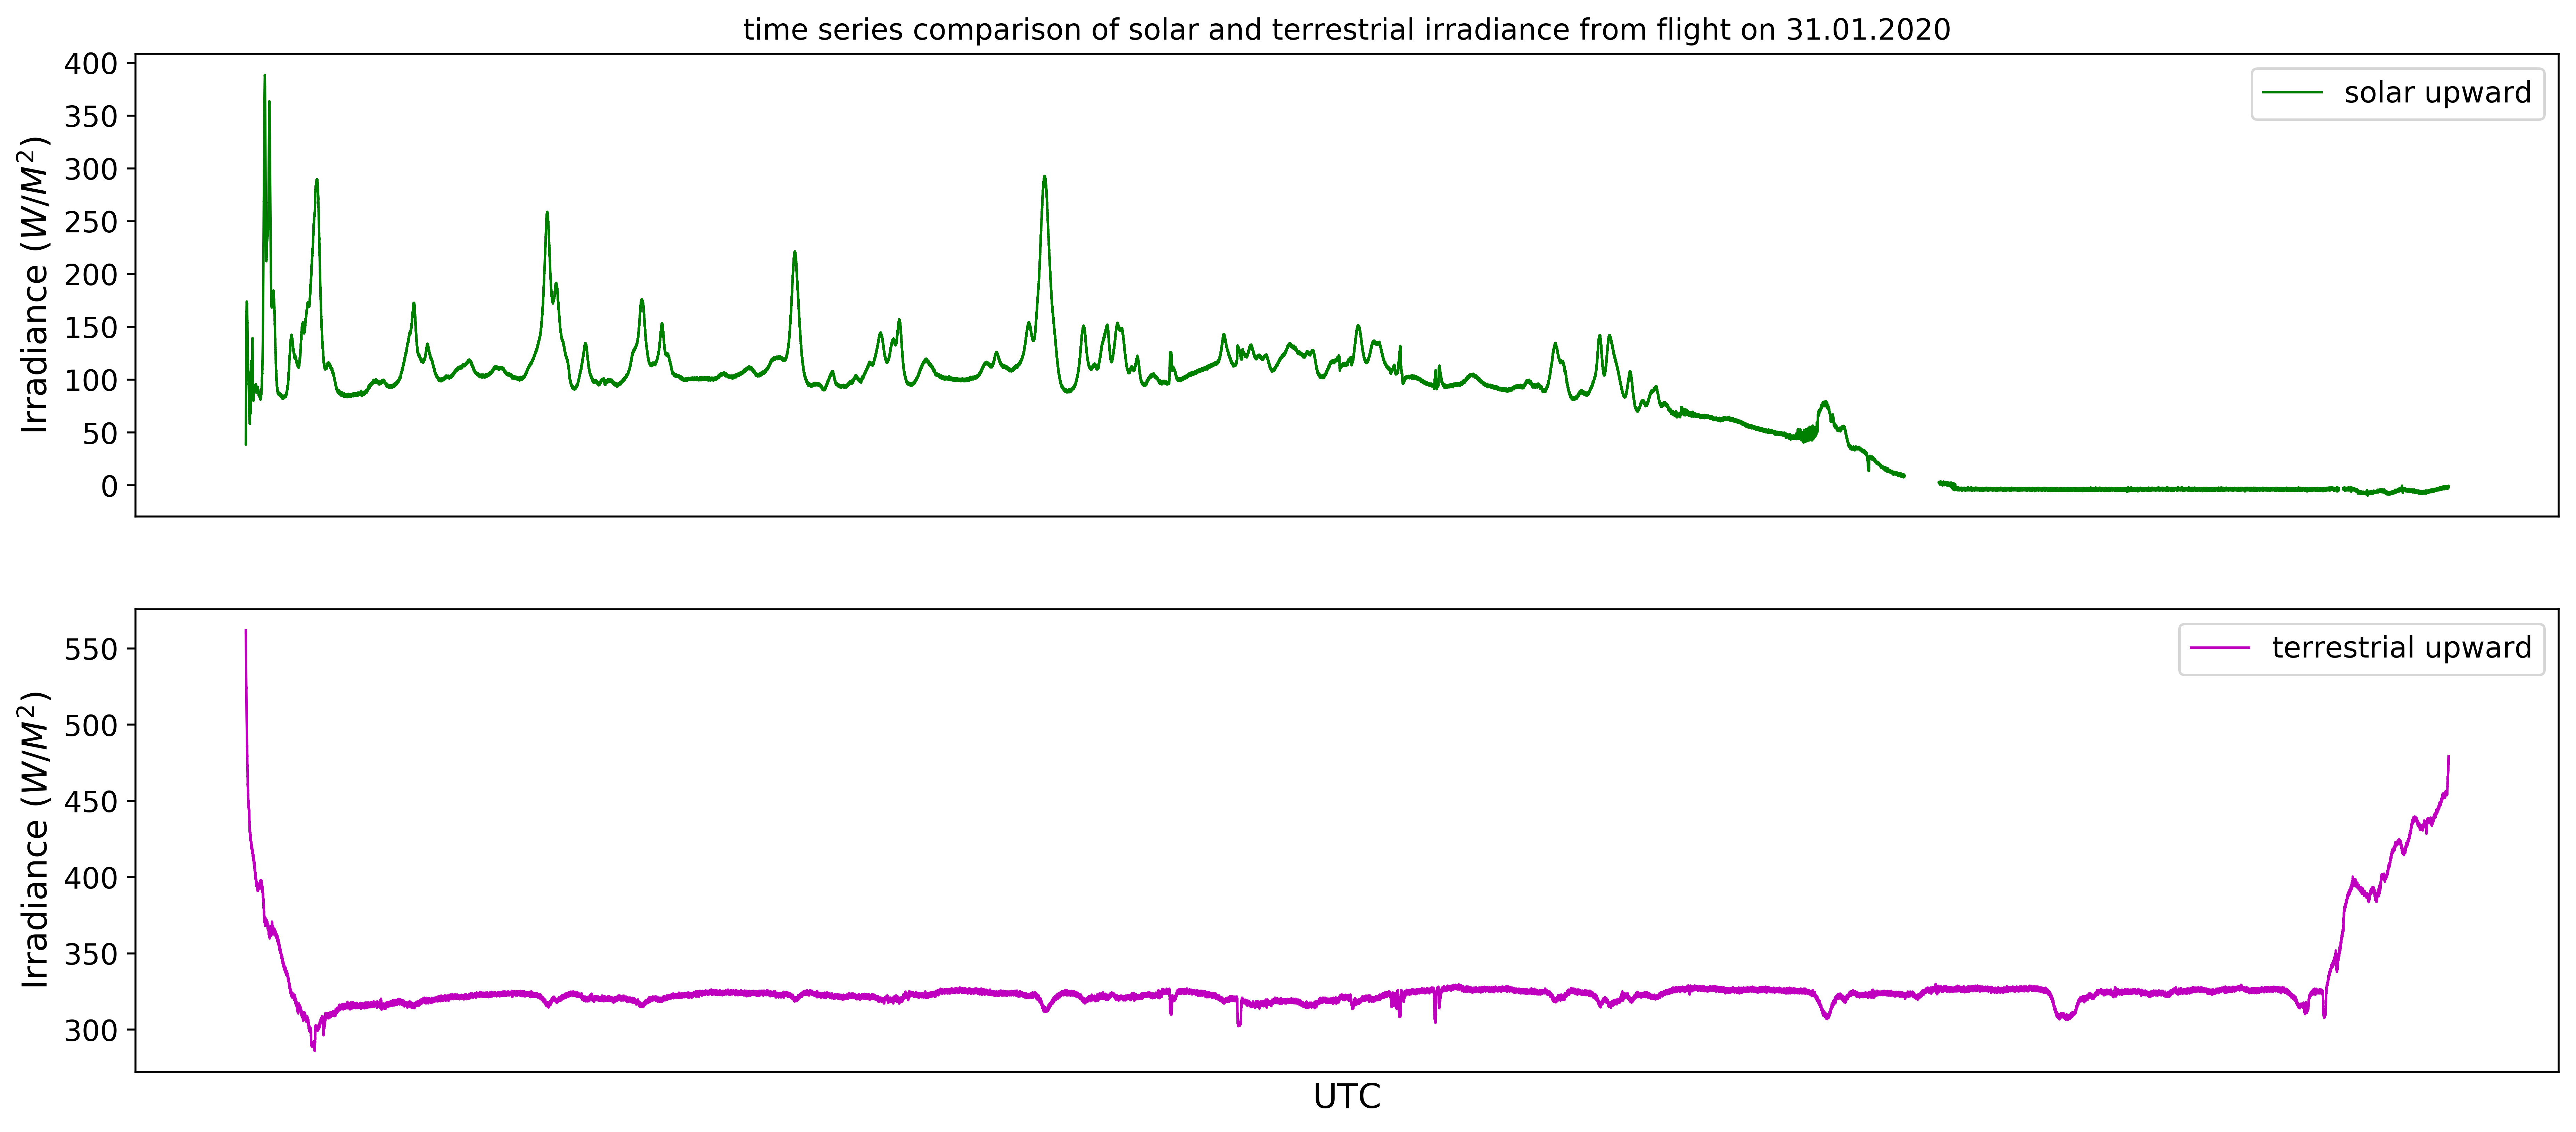

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
#df_new_24jan = pd.read_csv('df_new_24jan.csv')
plt.figure(figsize=(18,12),dpi=500)
plt.subplot(311)
plt.plot(df_big.Time,df_big.ShortWave_up, 'g', label = 'solar upward',linewidth=1)
plt.yticks(fontsize=12)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
#plt.xlabel('UTC',fontsize=14)
plt.legend(fontsize=12)
plt.xticks([], [])
plt.title('time series comparison of solar and terrestrial irradiance from flight on 31.01.2020')
plt.subplot(312)
plt.plot(df_big.Time,df_big.LongWave_up, 'm', label = 'terrestrial upward',linewidth=1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xlabel('UTC',fontsize=14)
plt.legend(fontsize=12)
plt.xticks([], [])
plt.show()